In [1]:
from utils import *

In [2]:
classes = ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

In [3]:
colors = [(random_color(), random_color(), random_color()) for c in classes if classes]
print(colors)

[(83, 139, 127), (136, 254, 137), (191, 217, 48), (93, 190, 90), (50, 142, 250), (31, 165, 76), (33, 11, 88), (242, 148, 171), (199, 76, 166), (88, 168, 192), (10, 225, 90), (59, 40, 122), (7, 170, 117), (157, 236, 1), (127, 139, 164), (5, 78, 68), (227, 105, 170), (232, 109, 132), (178, 38, 40), (237, 156, 111), (246, 3, 147), (46, 203, 25), (94, 31, 61), (7, 210, 88), (9, 31, 230), (206, 37, 145), (226, 73, 179), (68, 212, 128), (69, 8, 12), (109, 224, 161), (83, 183, 141), (230, 3, 61), (64, 113, 111), (241, 128, 34), (57, 190, 185), (153, 147, 78), (50, 90, 128), (59, 200, 174), (133, 106, 249), (85, 150, 52), (129, 228, 132), (250, 153, 22), (250, 18, 195), (190, 100, 15), (185, 217, 242), (175, 134, 187), (130, 241, 40), (250, 157, 139), (88, 57, 196), (116, 70, 111), (178, 52, 89), (43, 187, 189)]


In [4]:
dst = '/home/enzo/Datasets/playing_cards'

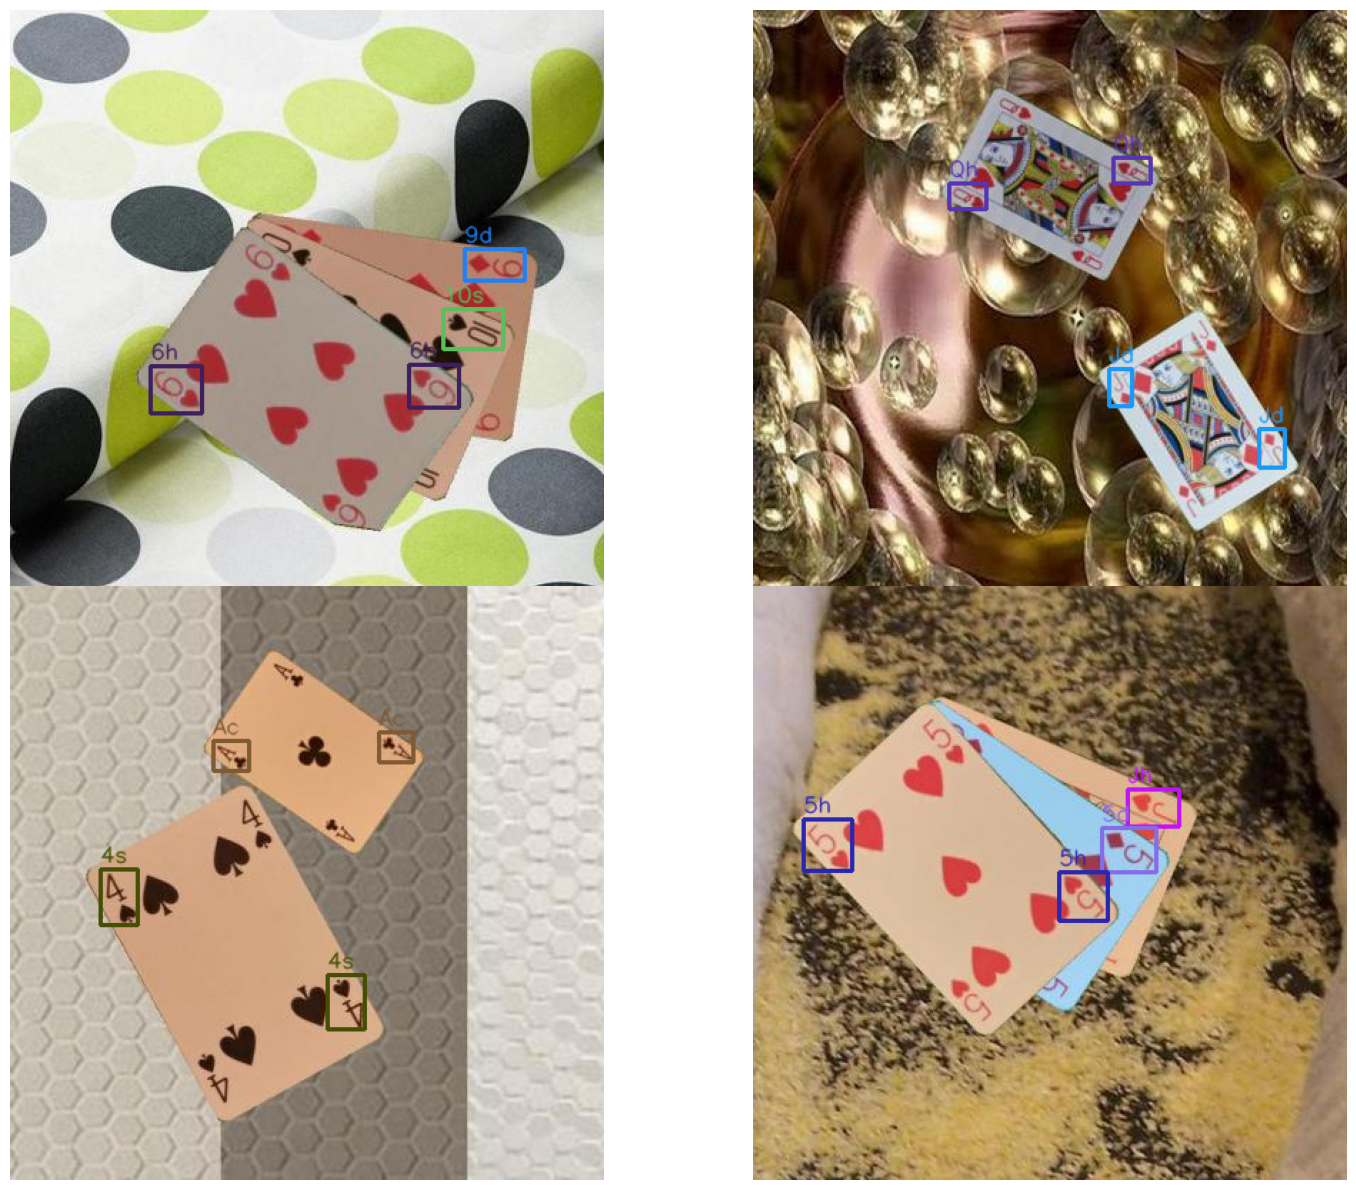

In [5]:
# Visualize a few training images.
plot(
    image_paths=dst + '/train/images', 
    label_paths=dst + '/train/labels',
    num_samples=4,
    colors = colors,
    classes = classes,
)

In [6]:
cwd = os.getcwd()
print(cwd)

/home/enzo/playing_cards


In [7]:
import yaml

attr = {
    'path': '/home/enzo/Datasets/playing_cards',
    'train': '/home/enzo/Datasets/playing_cards/train',
    'val': '/home/enzo/Datasets/playing_cards/valid',
    'test': '/home/enzo/Datasets/playing_cards/test',
    
    'names': classes
}

with open('playing_cards.yaml', 'w') as f:
    yaml.dump(attr, f)

In [9]:
EPOCHS = 20
!yolo \
task=detect \
mode=train \
model=yolov8s.yaml \
pretrained=yolov8s.pt \
imgsz=640 \
data=playing_cards.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8s_{EPOCHS} \
exist_ok=True

Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.2.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.4.0a0+07cecf4168.nv24.05 CUDA:0 (NVIDIA TITAN Xp, 12182MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=playing_cards.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_20, exist_ok=True, pretrained=yolov8s.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

In [10]:
# Evaluation on the test set.
!yolo val \
split='val' \
model='runs/detect/yolov8s_20/weights/best.pt' \
data='playing_cards.yaml' \
plots=True \
device=0

Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.4.0a0+07cecf4168.nv24.05 CUDA:0 (NVIDIA TITAN Xp, 12182MiB)
YOLOv8s summary (fused): 168 layers, 11145708 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /home/enzo/Datasets/playing_cards/valid/labels.cache... 4000 image
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       4000      15159      0.831      0.912      0.918      0.824
                   10c        180        282      0.718      0.895      0.885      0.764
                   10d        188        290      0.688      0.976      0.911       0.78
                   10h        201        322      0.689      0.898      0.827      0.706
                   10s        165        250       0.79      0.916      0.935      0.781
                    2c        193        295      0.867      0.993      0.987      0.902
                    2d        167        259      0.843      0.985       0.98      0.884
                    2h 

In [13]:
!yolo predict \
model='runs/detect/yolov8s_20/weights/best.pt' \
source='/home/enzo/Datasets/playing_cards/test/images/000246247_jpg.rf.fb915aef7c063ce2ac971f8de0d8b2c1.jpg' \
name='yolov8s_20_predict' \
exist_ok=True \
save=True \
conf=0.5 \
iou=0.5 \
agnostic_nms = True

Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.4.0a0+07cecf4168.nv24.05 CUDA:0 (NVIDIA TITAN Xp, 12182MiB)
YOLOv8s summary (fused): 168 layers, 11145708 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /home/enzo/Datasets/playing_cards/test/images/000246247_jpg.rf.fb915aef7c063ce2ac971f8de0d8b2c1.jpg: 640x640 2 7cs, 1 8d, 1 As, 8.6ms
Speed: 2.7ms preprocess, 8.6ms inference, 302.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/yolov8s_20_predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [23]:
images_to_predict = [os.path.join(attr.get('test'),
                     'images',
                     os.listdir('/home/enzo/Datasets/playing_cards/test/images')[:10][i])
                     for i in range(len(os.listdir('/home/enzo/Datasets/playing_cards/test/images')[:10]))]
images_to_predict

for image in images_to_predict:
    os.system(f"yolo predict \
                model='runs/detect/yolov8s_20/weights/best.pt' \
                source='{image}' \
                name='yolov8s_20_predict' \
                exist_ok=True \
                save=True \
                conf=0.5 \
                iou=0.5 \
                agnostic_nms = True")

Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.4.0a0+07cecf4168.nv24.05 CUDA:0 (NVIDIA TITAN Xp, 12182MiB)
YOLOv8s summary (fused): 168 layers, 11145708 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /home/enzo/Datasets/playing_cards/test/images/000246247_jpg.rf.fb915aef7c063ce2ac971f8de0d8b2c1.jpg: 640x640 2 7cs, 1 8d, 1 As, 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 102.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/yolov8s_20_predict
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.4.0a0+07cecf4168.nv24.05 CUDA:0 (NVIDIA TITAN Xp, 12182MiB)
YOLOv8s summary (fused): 168 layers, 11145708 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /home/enzo/Datasets/playing_cards/test/images/000355142_jpg.rf.7e5eff691d035112dd4b5021fe38a46c.jpg: 640x640 2 4ss, 1 8h, 1 Kh, 7.7ms
Speed: 2.5ms preprocess, 7.7ms inference, 266.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/d

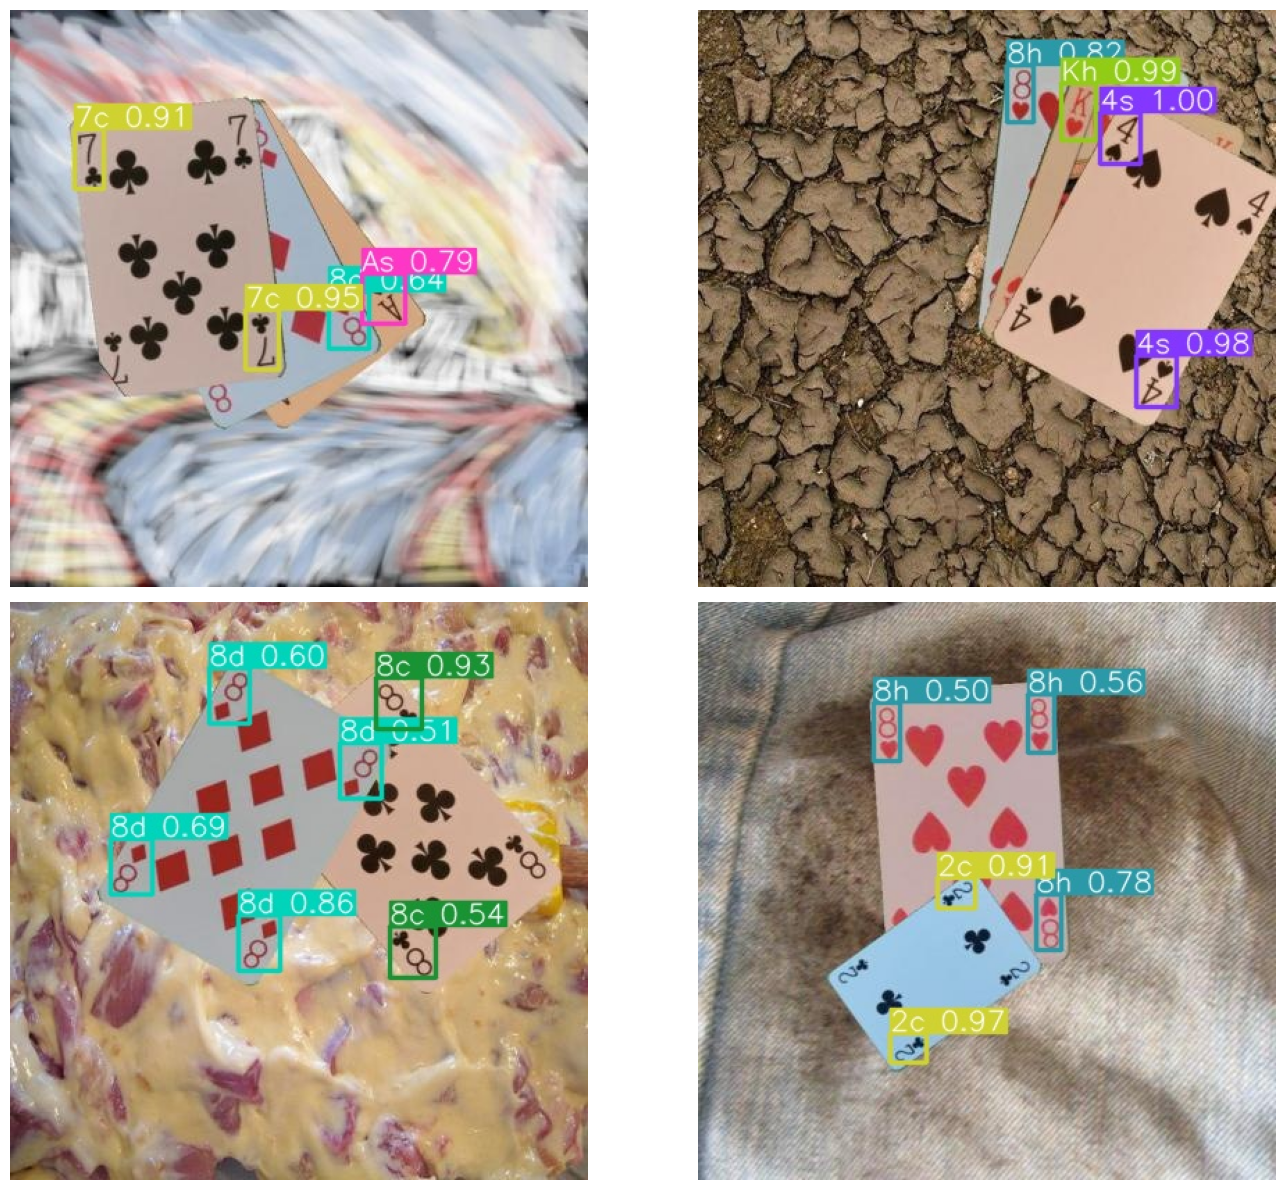

In [4]:
visualize('/home/enzo/playing_cards/runs/detect/yolov8s_20_predict')